In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read data
data = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\termo-lab\Det absolutte nulpunkt\Datafiler\temperaturogtryk.xlsx")

display(data.head())

T = data.iloc[:,0].tolist()
T = [t + 273.15 for t in T]

P = data.iloc[:,1].tolist()

T_icebath = np.mean([T[0], T[2], T[4]])
T_boiling = np.mean([T[1], T[3], T[5]])

P_icebath = np.mean([P[0], P[2], P[4]])
P_boiling = np.mean([P[1], P[3], P[5]])

# Uncertainties
dT = np.mean([np.std([T[0], T[2], T[4]]), np.std([T[1], T[3], T[5]])])
dP = np.mean([np.std([P[0], P[2], P[4]]), np.std([P[1], P[3], P[5]])])

print(f"Uncertainty in T: {dT} C")
print(f"Uncertainty in P: {dP} kPa")





,T [C],P [kPa]
0,1.6,94.603
1,98.0,115.907
2,3.9,95.045
3,97.5,115.970
4,1.6,94.792


Uncertainty in T: 0.7071067811865389 C
Uncertainty in P: 0.10538683435188675 kPa


Linear regression and calibration line

In [3]:
# 1. fit
linear = lambda x, a, b: a*x + b
popt, pcov = curve_fit(linear, P, T, sigma=[dT]*len(T), absolute_sigma=True)
a, b = popt
da, db = np.sqrt(np.diag(pcov))

print(a, b)
print(da, db)

dT_from_dP = a*dP
dT = np.sqrt(dT_from_dP**2 + dT**2)

# 2. fit
popt2, pcov2 = curve_fit(linear, P, T, sigma=[dT]*len(P), absolute_sigma=True)
a2, b2 = popt2
da2, db2 = np.sqrt(np.diag(pcov2))

print(a,b)
print(da2, db2)


4.583443840611532 -160.8136221106088
0.019184154398575202 2.0768917368697077
4.583443840611532 -160.8136221106088
0.02323299041651894 2.5152219614292606


In [4]:
# chi_kvadrat
def module_chi_squared(obs_data, model_data, obs_data_uncert):
    chi_squared = np.sum(((obs_data - model_data) / obs_data_uncert) ** 2)
    return chi_squared

# Reduceret chi_kvadrat
def module_chi_squared_reduced(obs_data, model_data, obs_data_uncert, num_params):
    chi_squared_reduced = module_chi_squared(obs_data, model_data, obs_data_uncert) / (len(obs_data) - num_params)
    return chi_squared_reduced

chi_squared = module_chi_squared(T, linear(np.array(P), a, b), dT)
chi_squared_reduced = module_chi_squared_reduced(T, linear(np.array(P), a, b), dT, 2)

print(f"Chi squared: {chi_squared}")
print(f"Reduced chi squared: {chi_squared_reduced}")



Chi squared: 77.7967073078697
Reduced chi squared: 2.431147103370928


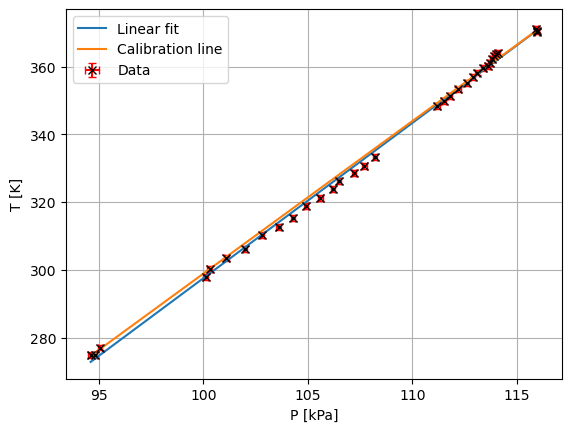

Absolute zero according to fit: -160.8 +/- 2.5 K
Absolute zero according to calibration line: -151.5 K
Z-value for the linear fit: 53.7
Z-value for the calibration line: inf


C:\Users\marcu\AppData\Local\Temp\ipykernel_20224\3404628514.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  z_val = lambda a, b, da, db: abs(a-b) / np.sqrt(da**2 + db**2)


In [10]:


# Calibration line
a_cal = (T_boiling - T_icebath)/(P_boiling - P_icebath)
cal_line = lambda x: a_cal*(x-P_icebath) + T_icebath

X = np.linspace(min([P_icebath, P[0]]), max([P_boiling, P[-1]]), 100000)

# Plot
plt.figure()
plt.errorbar(P, T, xerr=dP, yerr=dT, fmt='x', label="Data", color='black', ecolor='red', capsize=3)
plt.plot(X, linear(X, a2, b2), label=f"Linear fit")
plt.plot(X, cal_line(X), label=f"Calibration line")
plt.xlabel("P [kPa]")
plt.ylabel("T [K]")
plt.legend()
plt.grid()
plt.show()

print("Absolute zero according to fit: {:.1f} +/- {:.1f} K".format(b2, db2))
print("Absolute zero according to calibration line: {:.1f} K".format(cal_line(0)))

z_val = lambda a, b, da, db: abs(a-b) / np.sqrt(da**2 + db**2)

print("Z-value for the linear fit: {:.1f}".format(z_val(-161, 0, 3, 0)))


In [6]:
# Parameters and uncertainty
print(a2, b2)
print(da2, db2)

4.58344387161268 -160.81362547192433
0.02323299041651894 2.5152219614292606
